<a href="https://colab.research.google.com/github/peterbabulik/QantumKernel/blob/main/QantumKernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install cirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

=== Quantum Kernel Demonstration ===

Computing quantum kernel matrix...


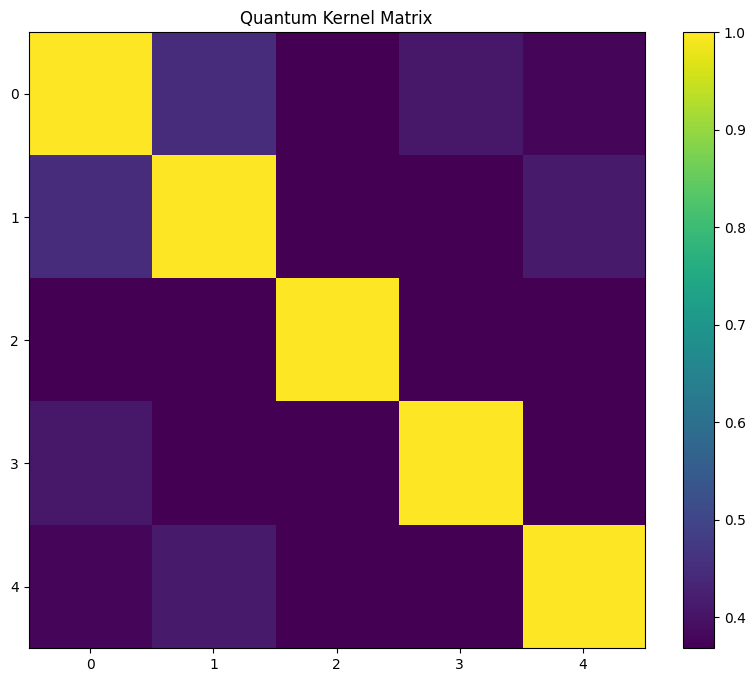


Kernel Matrix Shape: (5, 5)
Sample kernel values:
K(0,0) = 1.0000
K(0,1) = 0.4477
K(0,2) = 0.3680
K(1,0) = 0.4477
K(1,1) = 1.0000
K(1,2) = 0.3679
K(2,0) = 0.3680
K(2,1) = 0.3679
K(2,2) = 1.0000


In [ ]:

import cirq
import numpy as np
import tensorflow as tf
from typing import List, Optional, Tuple
import matplotlib.pyplot as plt

class QuantumKernel:
    """
    Quantum Kernel Implementation
    ----------------------------
    A quantum kernel is a method to map classical data into quantum Hilbert space,
    allowing us to perform quantum-enhanced feature mapping and measure similarities
    between data points in this quantum space.
    """

    def __init__(self,
                 n_qubits: int,
                 n_layers: int,
                 kernel_type: str = 'rbf'):
        """
        Initialize Quantum Kernel

        Args:
            n_qubits: Number of qubits to use
            n_layers: Depth of quantum circuit
            kernel_type: Type of quantum kernel ('rbf', 'polynomial', 'custom')
        """
        self.n_qubits = n_qubits
        self.n_layers = n_layers
        self.kernel_type = kernel_type
        self.qubits = cirq.LineQubit.range(n_qubits)
        self.simulator = cirq.Simulator()

        # Initialize parameters for quantum circuit
        self.params = self.initialize_parameters()

    def initialize_parameters(self) -> np.ndarray:
        """
        Initialize quantum circuit parameters.
        Returns random parameters for the quantum feature map.
        """
        n_params = self.n_qubits * self.n_layers * 3  # 3 rotation gates per qubit
        return np.random.uniform(-np.pi, np.pi, size=n_params)

    def create_quantum_circuit(self, x: np.ndarray) -> cirq.Circuit:
        """
        Create quantum circuit for feature mapping

        Args:
            x: Input data point to encode

        The circuit structure:
        1. State preparation (encoding classical data)
        2. Quantum feature mapping layers
        3. Entanglement operations
        """
        circuit = cirq.Circuit()

        # Data encoding layer
        for i, qubit in enumerate(self.qubits):
            if i < len(x):
                # Encode classical data point into quantum state
                circuit.append(cirq.ry(x[i])(qubit))

        # Feature mapping layers
        param_idx = 0
        for layer in range(self.n_layers):
            # Rotation gates for feature mapping
            for i, qubit in enumerate(self.qubits):
                # Apply three rotation gates (RX, RY, RZ)
                circuit.append([
                    cirq.rx(self.params[param_idx])(qubit),
                    cirq.ry(self.params[param_idx + 1])(qubit),
                    cirq.rz(self.params[param_idx + 2])(qubit)
                ])
                param_idx += 3

            # Entanglement layer
            for i in range(self.n_qubits - 1):
                circuit.append(cirq.CNOT(self.qubits[i], self.qubits[i + 1]))

        return circuit

    def quantum_state_vector(self, x: np.ndarray) -> np.ndarray:
        """
        Get quantum state vector for input data point

        Args:
            x: Input data point
        Returns:
            Quantum state vector
        """
        circuit = self.create_quantum_circuit(x)
        result = self.simulator.simulate(circuit)
        return result.final_state_vector

    def kernel_function(self, x1: np.ndarray, x2: np.ndarray) -> float:
        """
        Compute kernel value between two data points

        Args:
            x1, x2: Input data points
        Returns:
            Kernel value measuring similarity in quantum feature space
        """
        # Get quantum states
        state1 = self.quantum_state_vector(x1)
        state2 = self.quantum_state_vector(x2)

        if self.kernel_type == 'rbf':
            # RBF-like quantum kernel
            overlap = np.abs(np.vdot(state1, state2))**2
            return np.exp(-0.5 * (2 - 2 * overlap))

        elif self.kernel_type == 'polynomial':
            # Polynomial-like quantum kernel
            overlap = np.abs(np.vdot(state1, state2))**2
            return overlap**2

        else:  # default/custom
            # Direct quantum state overlap
            return np.abs(np.vdot(state1, state2))**2

    def compute_kernel_matrix(self, X: np.ndarray) -> np.ndarray:
        """
        Compute kernel matrix for a dataset

        Args:
            X: Dataset of shape (n_samples, n_features)
        Returns:
            Kernel matrix of shape (n_samples, n_samples)
        """
        n_samples = len(X)
        kernel_matrix = np.zeros((n_samples, n_samples))

        for i in range(n_samples):
            for j in range(i, n_samples):
                value = self.kernel_function(X[i], X[j])
                kernel_matrix[i, j] = value
                kernel_matrix[j, i] = value  # Symmetric matrix

        return kernel_matrix

    def visualize_kernel_matrix(self, X: np.ndarray):
        """Visualize kernel matrix for given data"""
        kernel_matrix = self.compute_kernel_matrix(X)
        plt.figure(figsize=(10, 8))
        plt.imshow(kernel_matrix, cmap='viridis')
        plt.colorbar()
        plt.title('Quantum Kernel Matrix')
        plt.show()
        return kernel_matrix

# Example usage and demonstration
if __name__ == "__main__":
    print("=== Quantum Kernel Demonstration ===")

    # Create sample data
    n_samples = 5
    n_features = 4
    X = np.random.uniform(-np.pi, np.pi, size=(n_samples, n_features))

    # Initialize quantum kernel
    qkernel = QuantumKernel(n_qubits=4, n_layers=2)

    # Compute and visualize kernel matrix
    print("\nComputing quantum kernel matrix...")
    kernel_matrix = qkernel.visualize_kernel_matrix(X)

    print("\nKernel Matrix Shape:", kernel_matrix.shape)
    print("Sample kernel values:")
    for i in range(min(3, n_samples)):
        for j in range(min(3, n_samples)):
            print(f"K({i},{j}) = {kernel_matrix[i,j]:.4f}")